# Project 1: Crawling 
## Incruit crawling by major code
### A반 원봄이

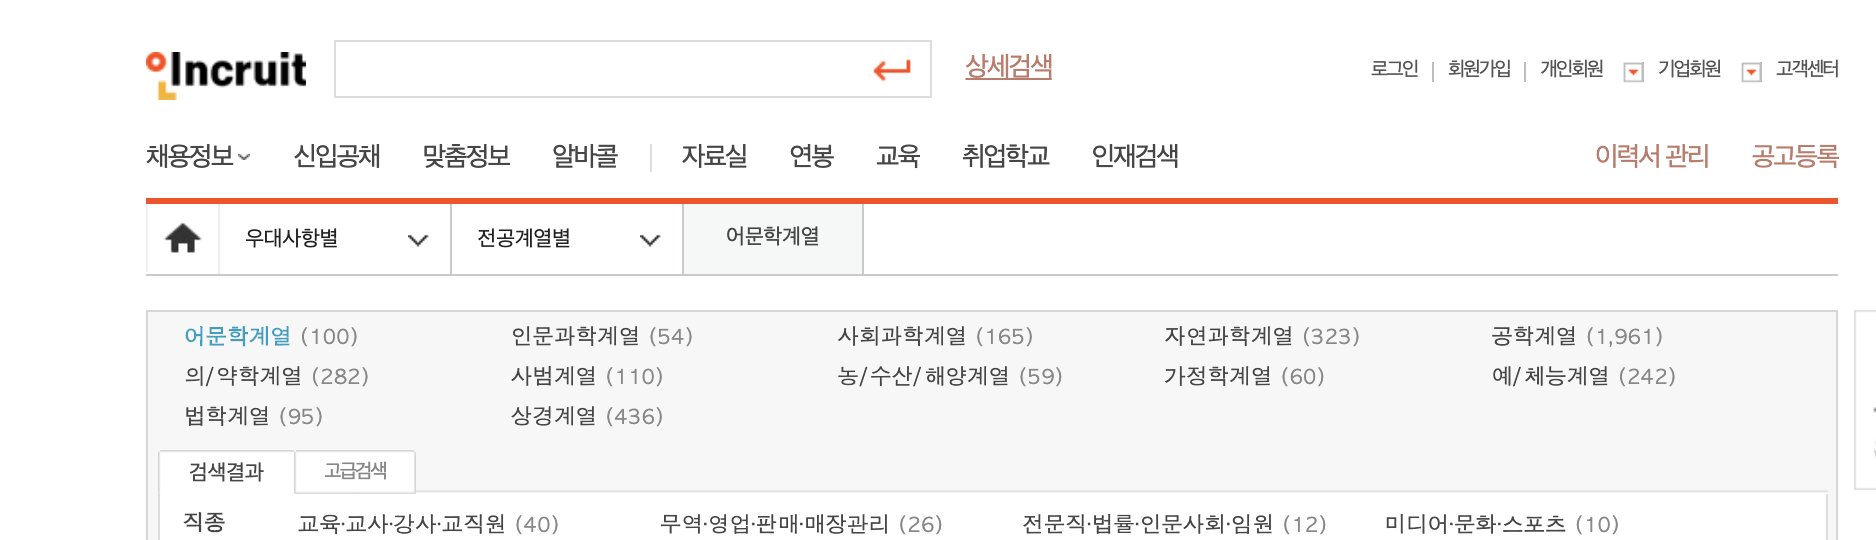

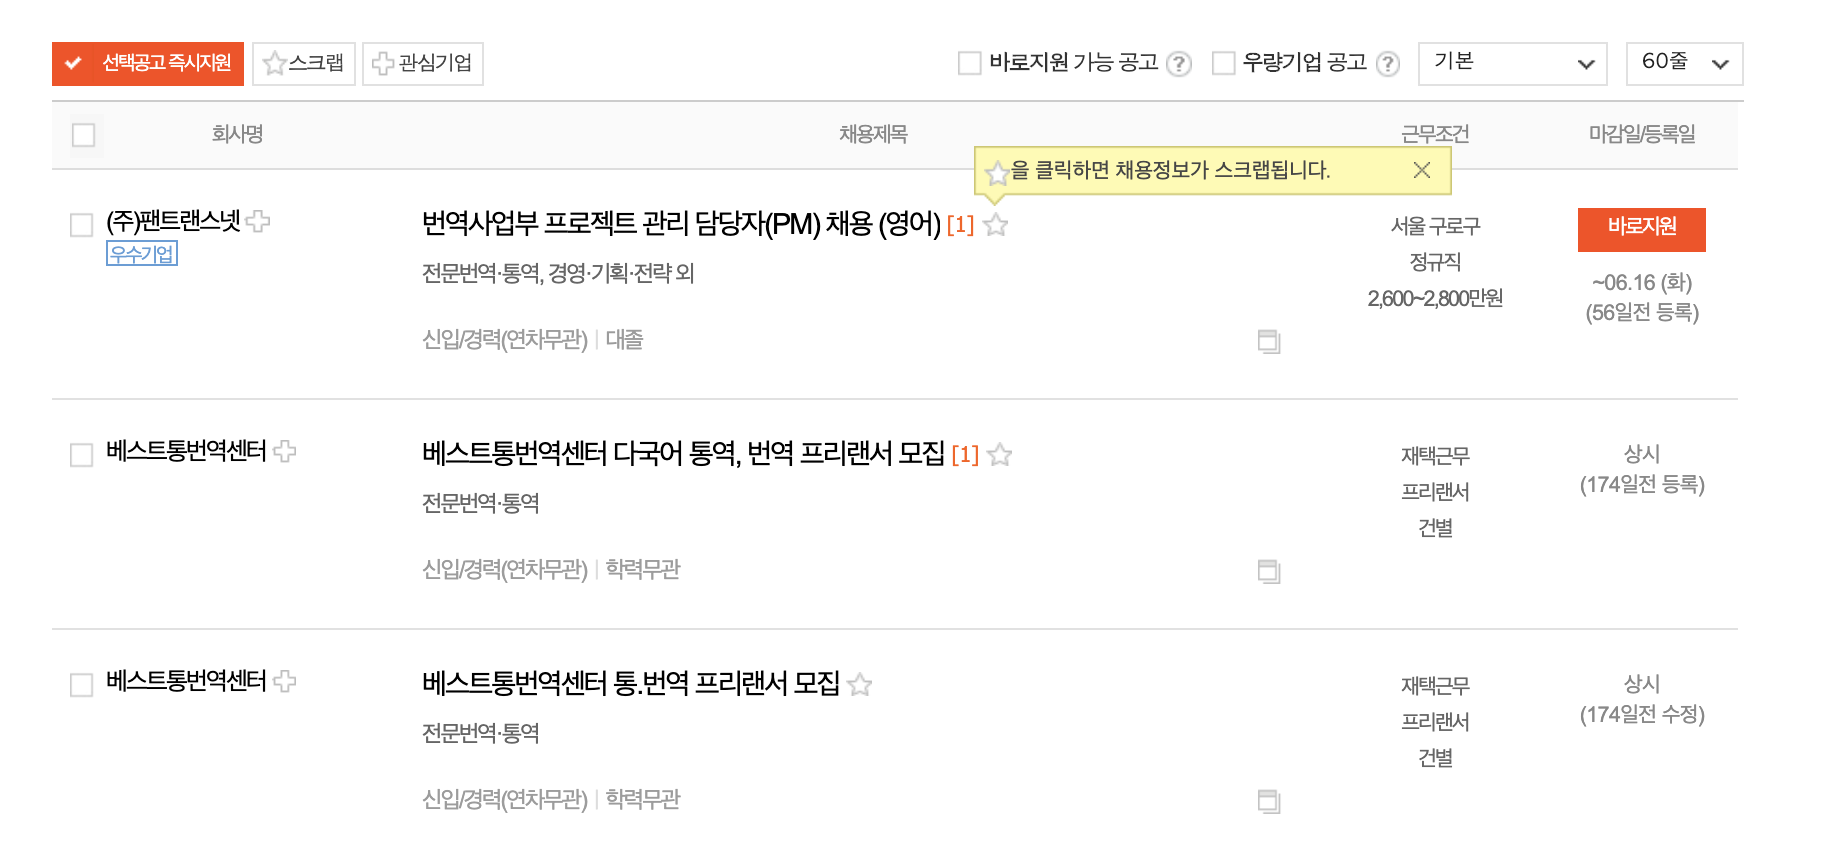

In [4]:
display(Image(filename='스크린샷 2020-06-12 13.06.37.png'))
display(Image(filename='스크린샷 2020-06-12 13.06.45.png'))

# parameter 분석
#### ct, ty: 고정값
#### cd: 전공계열 필터. 이를 코드로 제시하고 사용자에게 원하는 전공계열을 선택할 수 있도록 input으로 둠
#### page: 페이지 수 - 전공계열 별로 페이지 수가 다르므로 input 값에 따라 달라질 수 있도록 출력함
#### sortfield: 정렬 기준. 이를 코드로 제시하고 사용자에게 원하는 정렬 기준을 선택할 수 있도록 input으로 둠

## parameter 'cd'
    
    1 어문학계열
    2 인문과학계열 
    3 사회과학계열
    4 자연과학계열
    5 공학계열
    6 의/약학계열
    7 사범계열
    8 농/수산/해양계열
    9 가정학계열
    10 예/체능계열
    11 신학계열
    12 법학계열
    13 상경계열

# html 구조 
#### 표 형식이며,tbody 안에 한개의 th tag와 3개의 td 태그로 나누어져있음
#### 파라미터 요소 중 cd가 전공계열별로 다른 숫자이므로 이를 코드로 제시하고 사용자에게 입력받도록 함
#### th tag에 회사명 존재
#### 첫번째 td tag: 공고명, 직위, 학력 존재
#### 두번째 td tag: 월급, 지역 존재
#### 세번째 td tag: 등록일, 마감일 존재

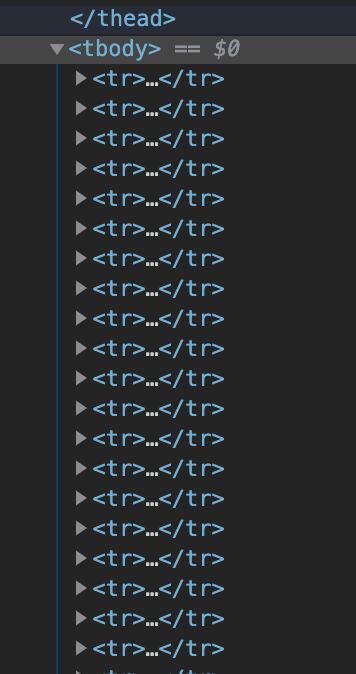

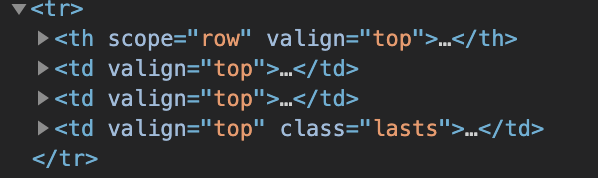

In [5]:
display(Image(filename='스크린샷 2020-06-08 19.16.24.png'))
display(Image(filename='스크린샷 2020-06-08 19.16.49.png'))

# 개선점
#### 1. 표를 잘라서 가져오는 것이 힘들었으므로 pandas를 활용하여 더 직관적으로 표 자체를 가져오는 방법 검토.
#### 2. 크롤링 결과 값으로 나오는 불필요하는 텍스트들에 대하여 텍스트 필터링에 대한 공부가 필요.
#### 3. 3개의 td tag를 자르는 것에 대하여: 인덱스 에러를 방지코자  if문을 넣어 length가 3개일 경우에만 검색되도록 필터링하였다. 하지만 이는 엄밀히 모든 정보를 가져오는 것이 아니기 때문에 이에 대한 개선이 필요.
#### 4. 페이지에 대한 파라미터에 대한 개선점이 필요.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Markdown,display,Image

In [8]:
# Parameter 설정
# 
x=int(input('계열코드를 입력해주세요.\n(1: 어문학계열, 2: 인문과학계열, 3: 사회과학계열, 4: 자연과학계열,\n5: 공학계열, 6: 의/약학계열, 7: 사범계열, 8: 농/수산/해양계열,\n9: 가정학계열, 10: 예/체능계열, 11: 신학계열, 12: 법학계열, 13: 상경계열) ==>'))

params_resp=requests.get('http://job.incruit.com/jobdb_list/searchjob.asp?ct=17&ty=2&cd=1')
params_soup=BeautifulSoup(params_resp.text)
div=params_soup.find('a',href="http://job.incruit.com/jobdb_list/searchjob.asp?ct=17&ty=2&cd=1")
div_anchor=params_soup.select('div.l_cate ul li span')
a_list=[]
p_list=[]
for a in div_anchor:
    a_list.append(a.text)

for i in range(0,12):
    if ',' in a_list[i]:
        p_list.append(int(a_list[i].rstrip(")'").lstrip("'('").replace(',','')))
    else:
        p_list.append(int(a_list[i].rstrip(")'").lstrip("'('")))

p_list.insert(10,0)
page_num=((p_list[x-1])//60)+1

print('페이지수:',page_num)

계열코드를 입력해주세요.
(1: 어문학계열, 2: 인문과학계열, 3: 사회과학계열, 4: 자연과학계열,
5: 공학계열, 6: 의/약학계열, 7: 사범계열, 8: 농/수산/해양계열,
9: 가정학계열, 10: 예/체능계열, 11: 신학계열, 12: 법학계열, 13: 상경계열) ==>1
페이지수: 2


In [9]:
table_info_list=[]
for i in range(1,page_num+1):
    base_url='http://job.incruit.com/jobdb_list/searchjob.asp'
    params={'ct': 17,
            'ty': 2,
            'cd': x,
            'page': i}

    resp=requests.get(base_url,params=params)
    soup=BeautifulSoup(resp.text)
    soup.prettify()
    
    tr_tags=soup.select('tbody>tr')
    tr_tags
    for tr in tr_tags:
        if tr!=None:
            name_tags= tr.select('div.check_list_r span>a')
            name_text_list=[name.text for name in name_tags]
  
            td_tags=tr.find_all('td',recursive=False)
            
            if len(td_tags)==3:
                title_td,detail_td,day_td=td_tags[0],td_tags[1],td_tags[2]
            title_tags=title_td.find('a')
            type_degree_tag=title_td.find_all('p',class_='details_txts')
            if len(type_degree_tag)==2:

                type_text=type_degree_tag[0].text.strip('\n')
                degree_text=type_degree_tag[1].text

            detail_text=detail_td.find('em').text.strip('\r\n').replace('\r\n',',').replace('\n','')
            dday_text=day_td.find(class_='ddays').text.strip('\n').lstrip('바로지원\n')
            mday_text=day_td.find(class_='mdays').text.lstrip('\n\n(').rstrip(')\n\n')


            table_info_list.append({'회사명': name_text_list,
                                    '공고 제목': title_tags.text,
                                    'URL': title_tags.get('href'),
                                    '공고 분류': type_text,
                                    '직위|학력': degree_text.replace('\r\n','/').replace('\n','').strip('\n').strip('\n').strip('\n인사\n면접').rstrip('\n자세히').rstrip('\n자세히').rstrip('\n인사\n자세히 보기'),
                                    '세부사항(지역, 고용형태, 급여 등)': detail_text.strip('\t\t\t\t\t'),
                                    '마감일': dday_text,
                                    '등록일': mday_text})
        else:
            pass

In [310]:
panda=pd.DataFrame(table_info_list)
display(panda)

,회사명,공고 제목,URL,공고 분류,직위|학력,"세부사항(지역, 고용형태, 급여 등)",마감일,등록일
0,"[ (주)팬트랜스넷 , 우수기업]",번역사업부 프로젝트 관리 담당자(PM) 채용 (영어),http://job.incruit.com/jobdb_info/jobpost.asp?...,"전문번역·통역, 경영·기획·전략 외",신입/경력(연차무관)|대졸,"서울 구로구,정규직,2,600~2,800만원,",~06.16 (화),56일전 등록
1,[ 베스트통번역센터 ],"베스트통번역센터 다국어 통역, 번역 프리랜서 모집",http://job.incruit.com/jobdb_info/jobpost.asp?...,전문번역·통역,신입/경력(연차무관)|학력무관,"재택근무,프리랜서,건별,",상시,174일전 등록
2,[ 베스트통번역센터 ],베스트통번역센터 통.번역 프리랜서 모집,http://job.incruit.com/jobdb_info/jobpost.asp?...,전문번역·통역,신입/경력(연차무관)|학력무관,"재택근무,프리랜서,건별,",상시,174일전 수정
3,"[ (주)한솔교육 , 우수기업]",배우면서 일하실 수 있습니다. 독서토론논술 및 한국사 지도/공부방 창업 문의/파트...,http://job.incruit.com/jobdb_info/jobpost.asp?...,"학습지·방문교사, 보습·입시강사 외",신입/경력1년미만|초대졸인사면접,"광주 서구,위촉직외,월급,",~07.10 (금),2일전 등록
4,"[ ㈜엘솔루 , 우수기업]",(주)엘솔루 중국어 기계 번역 튜닝 담당자 채용,http://job.incruit.com/jobdb_info/jobpost.asp?...,전문번역·통역,신입/경력(연차무관)|학력무관,"서울 외,계약직,월급 1,845,310원,",상시,9일전 등록
...,...,...,...,...,...,...,...,...
94,[ 토리시스템즈 ],무역 사무원 (영어) 모십니다. (포토샵 가능자 우대),http://job.incruit.com/jobdb_info/jobpost.asp?...,외국어강사,신입/경력(연차무관)|학력무관,"경기 안성시,정규직,2,400~3,240만원,",채용시,14일전 등록
95,[ 반디키즈클럽학원 ],유아 교육기관 영어강사 구인,http://job.incruit.com/jobdb_info/jobpost.asp?...,외국어강사,신입/경력(연차무관)|학력무관,"부산 해운대구,계약직,월급 1,400,000원,",채용시,10일전 수정
96,[ (주)화봉문고 ],(주)화봉문고 실장급 간부 채용 (경매회사 유경험자 우대),http://job.incruit.com/jobdb_info/jobpost.asp?...,외국어강사,신입/경력(연차무관)|학력무관,"서울 종로구,계약직,2,154만원 이상,",채용시,3시간전 수정
97,[ (주)화봉문고 ],(주)화봉문고 직원 채용 (경매회사 유경험자 우대),http://job.incruit.com/jobdb_info/jobpost.asp?...,외국어강사,신입/경력(연차무관)|학력무관,"서울 종로구,계약직,2,154만원 이상,",~06.30 (화),3시간전 수정


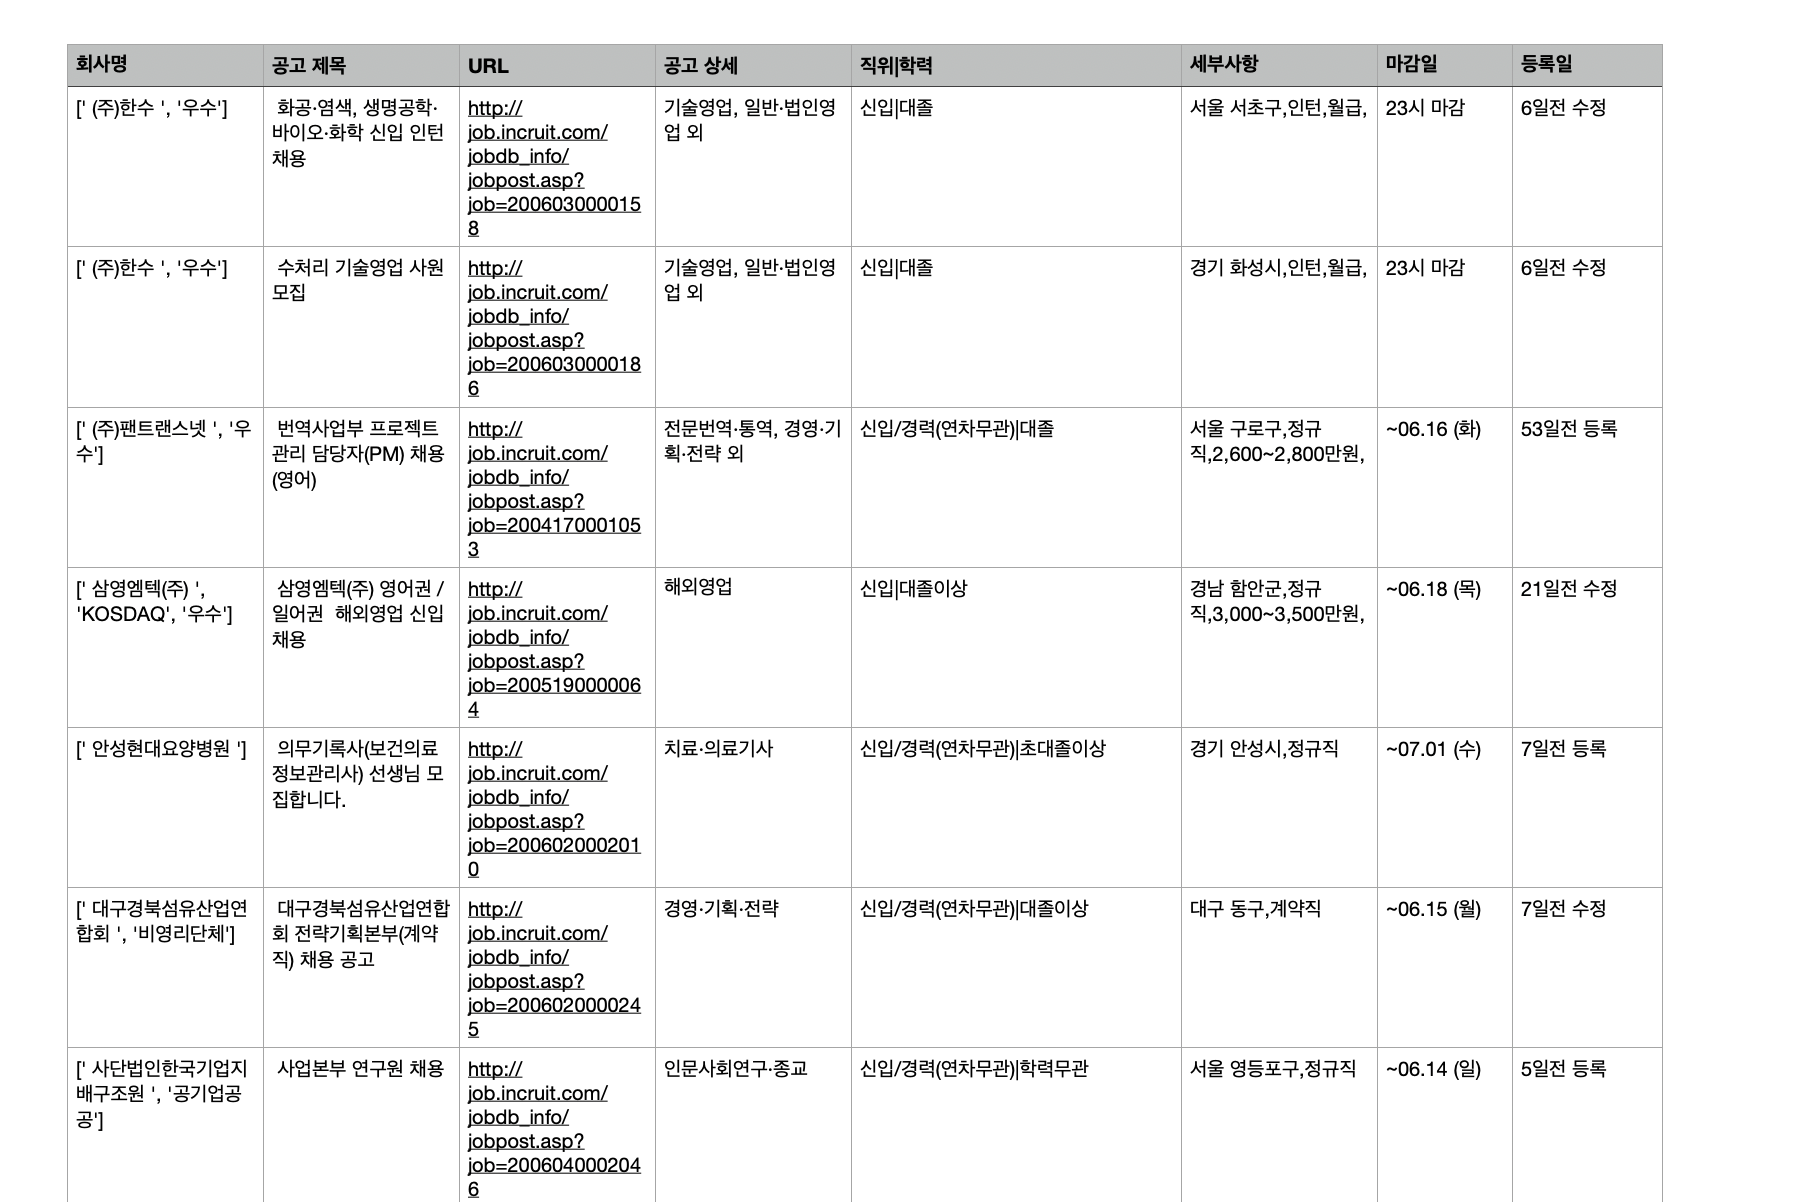

In [7]:
display(Image(filename='스크린샷 2020-06-12 15.31.59.png'))